## K-Means

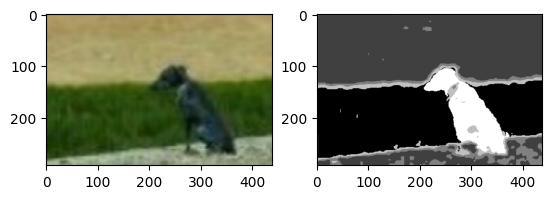

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
img=cv2.imread('image.png')

row = img.shape[0]
col = img.shape[1]
plt.subplot(121)
plt.imshow(img)

def k_means(data, iter, k):
    data = data.reshape(-1, 3)

    ones = np.ones((data.shape[0], 3))
    data = np.column_stack((data, ones))
    # 1.随机产生初始均值向量
    cluster_center = data[np.random.choice(row*col, k)]
    # 2.分类
    distance = [[] for i in range(k)]
    for i in range(iter):
        #print("迭代次数：", i)
        # 2.1距离计算
        for j in range(k):
            distance[j] = np.sqrt(np.sum((data - cluster_center[j])**2, axis=1))
        # 2.2归类
        data[:, 3] = np.argmin(distance, axis=0)
        # 3.计算新簇心
        for j in range(k):
            cluster_center[j] = np.mean(data[data[:, 3] == j], axis=0)
    return data[:, 3]


if __name__ == "__main__":
    image_show = k_means(img, 100, 5)
    image_show = image_show.reshape(row, col)
    plt.subplot(122)
    plt.imshow(image_show, cmap='gray')
    plt.show()

## FCM

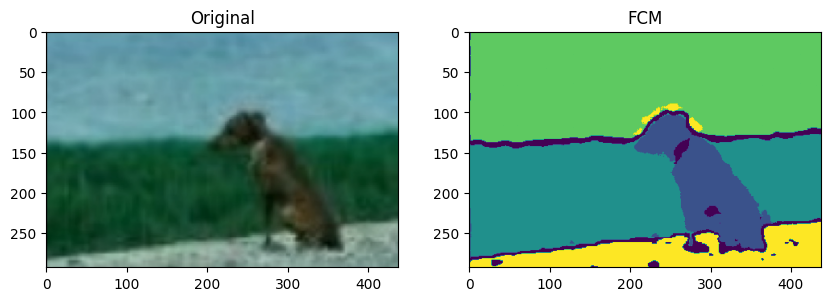

In [28]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from matplotlib import font_manager

def initialize_membership(X, c):
    # 1.初始化隶属度矩阵
    U = np.random.dirichlet(np.ones(c), size=X.shape[0])
    return U

def update_centroids(X, U, m):
    # 更新质心
    um = U ** m
    centroids = (um.T @ X) / um.sum(axis=0)[:, None]
    return centroids

def update_membership(X, centroids, m):
    # 更新隶属度矩阵
    dist = np.linalg.norm(X[:, None] - centroids, axis=2)
    dist = np.fmax(dist, np.finfo(np.float64).eps)  # 避免除以零
    inv_dist = 1.0 / dist
    power = 2.0 / (m - 1)
    U_new = inv_dist ** power / (inv_dist ** power).sum(axis=1, keepdims=True)
    return U_new

def has_converged(U, U_new, tol=1e-4):
    #检查隶属度矩阵是否收敛
    return np.linalg.norm(U - U_new) < tol

def fcm(X, c, m=2.0, max_iters=100):
    # FCM聚类算法
    U = initialize_membership(X, c)
    for _ in range(max_iters):
        centroids = update_centroids(X, U, m)
        U_new = update_membership(X, centroids, m)
        if has_converged(U, U_new):
            break
        U = U_new
    return U, centroids



image = cv2.imread(r"image.png")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


pixels = image.reshape(-1, 3)
# 使用FCM聚类
U, centroids = fcm(pixels, 5)
clusters = np.argmax(U, axis=1)
segmented_image = clusters.reshape(image.shape[:2])

# 显示原始图像和分割后的图像
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(image)
ax[0].set_title('Original')
ax[1].imshow(segmented_image)
ax[1].set_title('FCM')
plt.show()